In [1]:
from utils import *
from speedup import *

---
# Reference file

In [2]:
with open("/v/volumes/nanopore/ref/p300_ID3.fasta", 'r') as file:
    p300_ID3_ref = file.read().split('\n')[1]
p300_ID3_ref = np.array(list(p300_ID3_ref))
print(f'Length of ref sequence: {len(p300_ID3_ref)}')
p300_ID3_ref

Length of ref sequence: 1164


array(['A', 'A', 'C', ..., 'C', 'A', 'G'], dtype='<U1')

In [3]:
find_the_loneliest_base_in_seq(p300_ID3_ref, verbose=True)
pos_of_loneliest_thymine = find_the_loneliest_base_in_seq(p300_ID3_ref, verbose=False)

The position of the loneliest base 'T': 692
Distances between the neighborhood: [ 6 15 20  1]
The subsequence:
 ['T' 'C' 'C' 'A' 'A' 'G' 'G' 'C' 'A' 'G' 'A' 'C' 'A' 'C' 'C' 'T' 'A' 'C'
 'A' 'C' 'C' 'A' 'C' 'C' 'A' 'A' 'C' 'A' 'A' 'C' 'A' 'C' 'A' 'A' 'C' 'T']


---
# Thymine dataset

In [4]:
T_sam_data = read_sam(sorted(glob("/v/projects/nanopore/balazs/data/thymine_0421/*0.sam")),
                      min_length=len(p300_ID3_ref)*0.8,
                      max_length=len(p300_ID3_ref)*1.2, 
                      min_MAPQ=59,
                      max_insertion=7, 
                      max_deletion=7,
                      max_indel_frequency=0.4,
                      verbose=True
                     )
path_to_Thymine_fast5 = '/v/projects/nanopore/agnes/signal_visualization/data/timin0421/workspace/'

Loading data: 100%|██████████| 7/7 [00:11<00:00,  1.63s/it]

Number of reads stored: 17420


In [5]:
# thymine forward strands
T_forward_strands = search_in_data(T_sam_data, "sam_flag",  0, only_first_match=False) 
thymine_fwd_strd = get_raw_signal_with_bases(T_forward_strands, path_to_Thymine_fast5, reference_sequence=p300_ID3_ref)

Processing data: 100%|██████████| 11167/11167 [02:52<00:00, 64.55it/s]


In [6]:
# thymine reverse strands
T_reverse_strands = search_in_data(T_sam_data, "sam_flag", 16, only_first_match=False)
thymine_rvs_strd = get_raw_signal_with_bases(T_reverse_strands, path_to_Thymine_fast5, reference_sequence=p300_ID3_ref)

Processing data: 100%|██████████| 6253/6253 [01:50<00:00, 56.64it/s]


---
# Uracil dataset

In [7]:
U_sam_data = read_sam(sorted(glob("/v/projects/nanopore/balazs/data/uracil_0504/*0.sam"))[:10],
                      min_length=len(p300_ID3_ref)*0.8,
                      max_length=len(p300_ID3_ref)*1.2, 
                      min_MAPQ=59,
                      max_insertion=5, 
                      max_deletion=5,
                      max_indel_frequency=0.4,
                      verbose=True
                     )
path_to_Uracil_fast5 = '/v/projects/nanopore/agnes/signal_visualization/uracil0504/guppy/workspace/'

Loading data: 100%|██████████| 10/10 [00:24<00:00,  2.42s/it]

Number of reads stored: 22184


In [8]:
# uracil forward strands
U_forward_strands = search_in_data(U_sam_data, "sam_flag",  0, only_first_match=False)
uracil_fwd_strd = get_raw_signal_with_bases(U_forward_strands, path_to_Uracil_fast5, reference_sequence=p300_ID3_ref)
test_basecall_accuracy(uracil_fwd_strd)

Processing data: 100%|██████████| 11087/11087 [04:18<00:00, 42.81it/s] 


Min accuracy:  85.027%
Max accuracy:  99.912%
Mean accuracy: 98.070%
Std accuracy:  1.228%


In [9]:
# uracil reverse strands
U_reverse_strands = search_in_data(U_sam_data, "sam_flag", 16, only_first_match=False)
uracil_rvs_strd = get_raw_signal_with_bases(U_reverse_strands, path_to_Uracil_fast5, reference_sequence=p300_ID3_ref)
test_basecall_accuracy(uracil_rvs_strd)

Processing data: 100%|██████████| 11097/11097 [03:10<00:00, 58.29it/s]


Min accuracy:  87.167%
Max accuracy:  99.911%
Mean accuracy: 97.999%
Std accuracy:  1.203%


---
# Violin plot in the neighborhood of a lonely T/U
### forward 

In [10]:
num_of_left_neighbors, num_of_right_neighbors = 7, 7 #5, 5

In [24]:
mean_signal_in_searched_pos_T_fwd = []
base_positions_T_fwd = []

for i in range(len(thymine_fwd_strd)):
    number_of_insertions = sum(thymine_fwd_strd[i]['ref_seq'][:pos_of_loneliest_thymine]=='')
    idx = find_the_loneliest_base_in_seq(thymine_fwd_strd[i]['ref_seq'])
    if idx in range(pos_of_loneliest_thymine-15, pos_of_loneliest_thymine+15):
        ms = []
        pos = []
        for j in np.arange(-num_of_left_neighbors, num_of_right_neighbors+1):
            ms.append(thymine_fwd_strd[i]['mean_signal'][idx+j])
            pos.append(j)
        mean_signal_in_searched_pos_T_fwd.append(ms)
        base_positions_T_fwd.append(pos)

In [25]:
mean_signal_in_searched_pos_U_fwd = []
base_positions_U_fwd = []

for i in range(len(uracil_fwd_strd)):
    number_of_insertions = sum(uracil_fwd_strd[i]['ref_seq'][:pos_of_loneliest_thymine]=='')
    idx = find_the_loneliest_base_in_seq(uracil_fwd_strd[i]['ref_seq'])
    if idx in range(pos_of_loneliest_thymine-15, pos_of_loneliest_thymine+15):
        ms = []
        pos = []
        for j in np.arange(-num_of_left_neighbors, num_of_right_neighbors+1):
            ms.append(uracil_fwd_strd[i]['mean_signal'][idx+j])
            pos.append(j)
        mean_signal_in_searched_pos_U_fwd.append(ms)
        base_positions_U_fwd.append(pos)

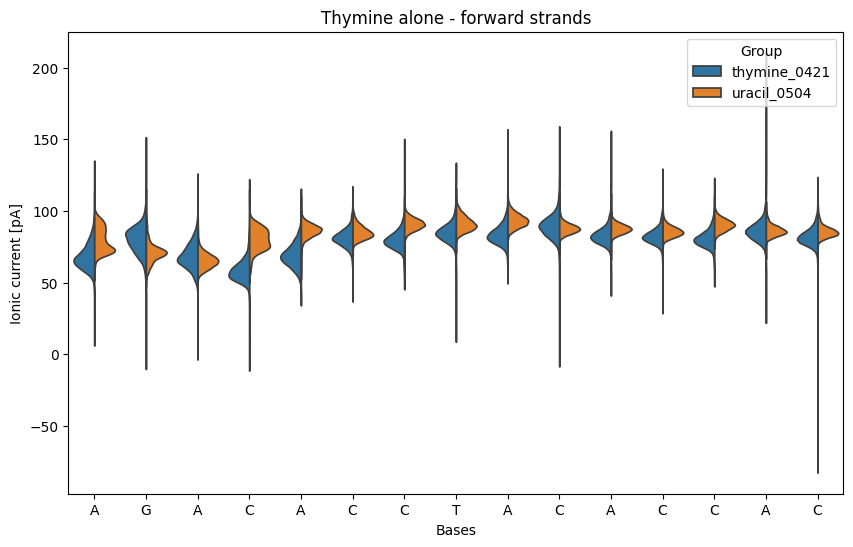

In [26]:
pos_T_fwd = np.array(base_positions_T_fwd)  
pos_U_fwd = np.array(base_positions_U_fwd)  
value_T_fwd = np.array(mean_signal_in_searched_pos_T_fwd)
value_U_fwd = np.array(mean_signal_in_searched_pos_U_fwd)

# Create a DataFrame for easier plotting
data_T_fwd = pd.DataFrame({
    "Bases": pos_T_fwd.flatten(),
    "IonicCurrent": value_T_fwd.flatten(),
    "Group": "thymine_0421"
})

data_U_fwd = pd.DataFrame({
    "Bases": pos_U_fwd.flatten(),
    "IonicCurrent": value_U_fwd.flatten(),
    "Group": "uracil_0504"
})

# Combine both datasets
fwd_violin_df = pd.concat([data_T_fwd, data_U_fwd], ignore_index=True)

plt.figure(figsize=(10, 6))
sns.violinplot(data=fwd_violin_df, x="Bases", y="IonicCurrent", hue="Group", split=True, density_norm="width", inner=None)
plt.xlabel("Bases")
plt.ylabel("Ionic current [pA]")
plt.title("Thymine alone - forward strands")
plt.xticks(ticks=np.arange(len(pos_T_fwd[0])),
           labels=p300_ID3_ref[pos_of_loneliest_thymine - num_of_left_neighbors: pos_of_loneliest_thymine + num_of_right_neighbors + 1])
plt.savefig('figures/violin_plot_forward_strands.jpg', bbox_inches='tight')
plt.show()

---
### reversed

In [14]:
mean_signal_in_searched_pos_T_rvs = []
base_positions_T_rvs = []

for i in range(len(thymine_rvs_strd)):
    number_of_insertions = sum(thymine_rvs_strd[i]['ref_seq'][:pos_of_loneliest_thymine]=='')
    idx = find_the_loneliest_base_in_seq(thymine_rvs_strd[i]['ref_seq'])
    if idx in range(pos_of_loneliest_thymine-15, pos_of_loneliest_thymine+15):
        ms = []
        pos = []
        for j in np.arange(-num_of_left_neighbors, num_of_right_neighbors+1):
            ms.append(thymine_rvs_strd[i]['mean_signal'][idx+j])
            pos.append(j)
        mean_signal_in_searched_pos_T_rvs.append(ms)
        base_positions_T_rvs.append(pos)

In [15]:
mean_signal_in_searched_pos_U_rvs = []
base_positions_U_rvs = []

for i in range(len(uracil_rvs_strd)):
    number_of_insertions = sum(uracil_rvs_strd[i]['ref_seq'][:pos_of_loneliest_thymine]=='')
    idx = find_the_loneliest_base_in_seq(uracil_rvs_strd[i]['ref_seq'])
    if idx in range(pos_of_loneliest_thymine-15, pos_of_loneliest_thymine+15):
        ms = []
        pos = []
        for j in np.arange(-num_of_left_neighbors, num_of_right_neighbors+1):
            ms.append(uracil_rvs_strd[i]['mean_signal'][idx+j])
            pos.append(j)
        mean_signal_in_searched_pos_U_rvs.append(ms)
        base_positions_U_rvs.append(pos)

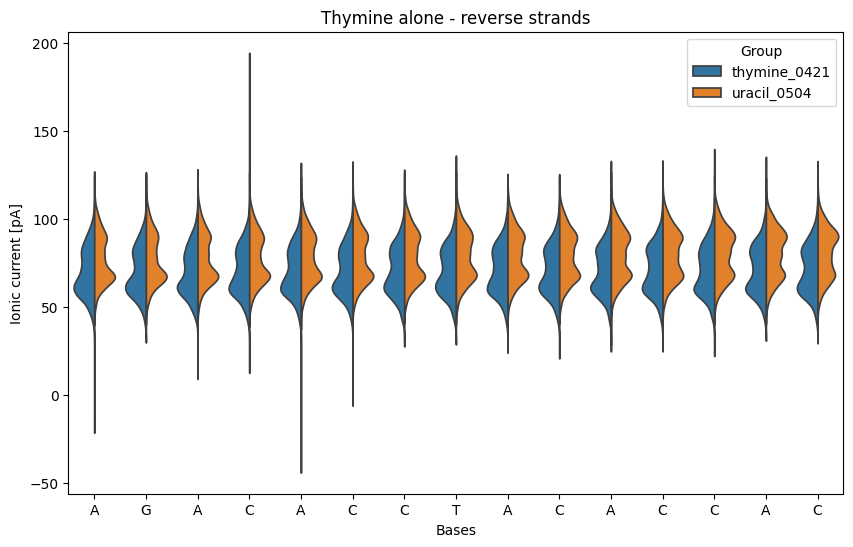

In [16]:
pos_T_rvs = np.array(base_positions_T_rvs)  
pos_U_rvs = np.array(base_positions_U_rvs)  
value_T_rvs = np.array(mean_signal_in_searched_pos_T_rvs)
value_U_rvs = np.array(mean_signal_in_searched_pos_U_rvs)

# Create a DataFrame for easier plotting
data_T_rvs = pd.DataFrame({
    "Bases": pos_T_rvs.flatten(),
    "IonicCurrent": value_T_rvs.flatten(),
    "Group": "thymine_0421"
})

data_U_rvs = pd.DataFrame({
    "Bases": pos_U_rvs.flatten(),
    "IonicCurrent": value_U_rvs.flatten(),
    "Group": "uracil_0504"
})

# Combine both datasets
rvs_violin_df = pd.concat([data_T_rvs, data_U_rvs], ignore_index=True)

plt.figure(figsize=(10, 6))
sns.violinplot(data=rvs_violin_df, x="Bases", y="IonicCurrent", hue="Group", split=True, density_norm="width", inner=None)
plt.xlabel("Bases")
plt.ylabel("Ionic current [pA]")
plt.title("Thymine alone - reverse strands")
plt.xticks(ticks=np.arange(len(pos_T_rvs[0])),
           labels=p300_ID3_ref[pos_of_loneliest_thymine - num_of_left_neighbors: pos_of_loneliest_thymine + num_of_right_neighbors + 1])
plt.savefig('figures/violin_plot_reverse_strands.jpg', bbox_inches='tight')
plt.show()


---
---
# Archived codes:

```python
## Violin plot

import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
import numpy as np
import pandas as pd

np.random.seed(10)
df = pd.DataFrame({
    "Category": np.tile(["A", "B", "C"], 50),
    "Value": np.concatenate([np.random.normal(loc=mu, scale=1, size=50) for mu in [5, 6, 7]])
})

# Violin plot with reduced width
plt.figure(figsize=(6, 4))
sns.violinplot(x="Category", y="Value", data=df, width=1)  # Reduce width to make violins narrower
plt.show()
```

```python
## Plot signal 

cumulative=0
x_last_before, y_last_before = [], []
for i in range(30):
    y_val_list = thymine_fwd_strd[0]['signal'][i]
    x_val_list = np.arange(cumulative, cumulative+len(y_val_list))
    cumulative+=len(y_val_list)
    plt.plot(x_val_list, y_val_list, '-')
```

```python
## Find interested region is modified ref sequence

XD = np.random.randint(100) ## example for wierd cases: XD=[26, 70]
print(XD)
num_of_insertions = sum(thymine_fwd_strd[XD]['ref_seq'][:pos_of_loneliest_thymine] == None)
idx = pos_of_loneliest_thymine + num_of_insertions - thymine_fwd_strd[XD]['mapped_position_index']
interested_region = thymine_fwd_strd[XD]['ref_seq'][idx-15:idx+21]
interested_region
```

```python
## only Thymine
for i in range(5):
    plt.hist(np.array(mean_signal_in_searched_pos_T)[:,i], bins=100, alpha=0.5)
plt.show()
```python